In [1]:
from amuse.lab import *
import galpy
from galpy import potential
from galpy.potential import Potential
from galpy.orbit import Orbit
from galpy.util import bovy_conversion
from amuse.lab import *

from amuse.support.literature import LiteratureReferencesMixIn
from amuse.units import units
from amuse.units import constants

from amuse.ext.galactic_potentials import MWpotentialBovy2015,MiyamotoNagai_profile,PowerLawCutoff_profile

import matplotlib.pyplot as plt

import numpy as np

import nbodypy as npy

import copy

from scipy.misc import derivative as deriv

r0=8.
v0=220.

In [2]:
print(galpy)

<module 'galpy' from '/Users/webbjj/Codes/galpy_webb/galpy/galpy/__init__.py'>


In [3]:
def test(x,c=np.array([1])):
    if not isinstance(x,float):
        out=np.sum(x * np.transpose(np.array([c,]*len(x))),axis=0)
    else:
        out=np.sum(x*c)
    return out

In [4]:
x=np.array([5.,6.])
y=np.array([1.,2.,3.])

print(test(x[0],y))
print(test(x[1],y))
print(test(x,y))
print(np.transpose(np.array([y,]*len(x))))

30.0
36.0
[30. 36.]
[[1. 1.]
 [2. 2.]
 [3. 3.]]


In [5]:
np.linspace(0,len(x)-1,len(x),dtype=int)

array([0, 1])

In [6]:
res=np.sum(x * np.transpose(np.array([y,]*len(x))),axis=0)
print(res)

[30. 36.]


In [7]:
print(galpy.__file__)

/Users/webbjj/Codes/galpy_webb/galpy/galpy/__init__.py


In [8]:
# Initiate and test bar potential with arrays
tform= -10. # bar periods
tsteady= 5. # bar periods, slowly grown
omega= 1.3 # Pattern speed of the bar
angle=25./180.*np.pi # Bar Angle
length=5. # Length of the bar
dp=potential.DehnenBarPotential(omegab=omega,rb=length/8.,Af=(1./75.),tform=tform,tsteady=tsteady,barphi=angle)
print(dp)

Ri=0.5*length/8.
Ro=1.5*length/8.
R=np.array([Ri,Ro])
z=np.array([0.,0.])
phi=np.array([0.,0.])

print(dp(Ri,0.,0.),dp(Ro,0.,0.))
print(dp(R,z,phi))
print([dp(Ri,0.,0.),dp(Ro,0.,0.)]==dp(R,z,phi))

print(dp.Rforce(Ri,0.,0.),dp.Rforce(Ro,0.,0.))
print(dp.Rforce(R,z,phi))
print([dp.Rforce(Ri,0.,0.),dp.Rforce(Ro,0.,0.)]==dp.Rforce(R,z,phi))

print(dp.phiforce(Ri,0.,0.),dp.phiforce(Ro,0.,0.))
print(dp.phiforce(R,z,phi))
print([dp.phiforce(Ri,0.,0.),dp.phiforce(Ro,0.,0.)]==dp.phiforce(R,z,phi))

print(dp.zforce(Ri,0.1,0.0),dp.zforce(Ro,0.1,0.0))
print(dp.zforce(R,np.array([0.1,0.1]),phi))
print([dp.zforce(Ri,0.1,0.0),dp.zforce(Ro,0.1,0.0)]==dp.zforce(R,np.array([0.1,0.1]),phi))

print(dp.R2deriv(Ri,0.,0.),dp.R2deriv(Ro,0.,0.))
print(dp.R2deriv(R,z,phi))
print([dp.R2deriv(Ri,0.,0.),dp.R2deriv(Ro,0.,0.)]==dp.R2deriv(R,z,phi))

print(dp.phi2deriv(Ri,0.,0.),dp.phi2deriv(Ro,0.,0.))
print(dp.phi2deriv(R,z,phi))
print([dp.phi2deriv(Ri,0.,0.),dp.phi2deriv(Ro,0.,0.)]==dp.phi2deriv(R,z,phi))

print(dp.Rphideriv(Ri,0.,0.),dp.Rphideriv(Ro,0.,0.))
print(dp.Rphideriv(R,z,phi))
print([dp.Rphideriv(Ri,0.,0.),dp.Rphideriv(Ro,0.,0.)]==dp.Rphideriv(R,z,phi))

print(dp.z2deriv(Ri,0.1,0.0),dp.z2deriv(Ro,0.1,0.0))
print(dp.z2deriv(R,np.array([0.1,0.1]),phi))
print([dp.z2deriv(Ri,0.1,0.0),dp.z2deriv(Ro,0.1,0.0)]==dp.z2deriv(R,np.array([0.1,0.1]),phi))

print(dp.Rzderiv(Ri,0.1,0.0),dp.Rzderiv(Ro,0.1,0.0))
print(dp.Rzderiv(R,np.array([0.1,0.1]),phi))
print([dp.Rzderiv(Ri,0.1,0.0),dp.Rzderiv(Ro,0.1,0.0)]==dp.Rzderiv(R,np.array([0.1,0.1]),phi))

print(dp.Rzderiv(R,np.array([0.1,0.1]),phi)[0])





-0.016069690242163485 -0.0025394078407369454
[-0.01606969 -0.00253941]
[ True  True]
-0.010284601754984631 -0.008126105090358224
[-0.0102846  -0.00812611]
[ True  True]
0.0383022221559489 0.006052696834520319
[0.03830222 0.0060527 ]
[ True  True]
-0.029930856622282443 -0.0013885546695978747
[-0.02993086 -0.00138855]
[ True  True]
0.06582145123190164 -0.03467138171886176
[ 0.06582145 -0.03467138]
[ True  True]
0.06427876096865394 0.010157631362947782
[0.06427876 0.01015763]
[ True  True]
0.024513422179807298 0.019368629870465018
[0.02451342 0.01936863]
[ True  True]
0.19101115709768635 0.012792081250417404
[0.19101116 0.01279208]
[ True  True]
-0.14687192113344888 -0.007288988590328789
[-0.14687192 -0.00728899]
[ True  True]
-0.14687192113344888


In [9]:
class SpiralArmsPotential(Potential):
    """Class that implements the spiral arms potential from (`Cox and Gomez 2002 <https://arxiv.org/abs/astro-ph/0207635>`__). Should be used to modulate an existing potential (density is positive in the arms, negative outside).
    
    .. math::
    
        \\Phi(R, \\phi, z) = -4 \\pi GH \\,\\rho_0 exp \\left( -\\frac{R-r_{ref}}{R_s} \\right) \\sum{\\frac{C_n}{K_n D_n} \\,\cos(n \\gamma) \\,\\mathrm{sech}^{B_n} \\left( \\frac{K_n z}{B_n} \\right)}

    where

    .. math::
        K_n &= \\frac{n N}{R \sin(\\alpha)} \\\\
        B_n &= K_n H (1 + 0.4 K_n H) \\\\
        D_n &= \\frac{1 + K_n H + 0.3 (K_n H)^2}{1 + 0.3 K_n H} \\\\

    and

    .. math::
        \\gamma = N \\left[\\phi - \\phi_{ref} - \\frac{\\ln(R/r_{ref})}{\\tan(\\alpha)} \\right]

    The default of :math:`C_n=[1]` gives a sinusoidal profile for the potential. An alternative from `Cox and Gomez (2002) <https://arxiv.org/abs/astro-ph/0207635>`__  creates a density that behaves approximately as a cosine squared in the arms but is separated by a flat interarm region by setting 

     .. math::
        C_n = \\left[\\frac{8}{3 \\pi}\,,\\frac{1}{2} \\,, \\frac{8}{15 \\pi}\\right]

    """
    normalize= property() # turn off normalize
    def __init__(self, amp=1, ro=None, vo=None, amp_units='density',
                 N=2, alpha=0.2, r_ref=1, phi_ref=0, Rs=0.3, H=0.125, omega=0, Cs=[1]):

        """
        NAME:       
            __init__
        PURPOSE:
            initialize a spiral arms potential
        INPUT:
            :amp: amplitude to be applied to the potential (default: 1); 
                        can be a Quantity with units of density. (:math:`amp = 4 \\pi G \\rho_0`)
            :ro: distance scales for translation into internal units (default from configuration file)
            :vo: velocity scales for translation into internal units (default from configuration file)
            :N: number of spiral arms
            :alpha: pitch angle of the logarithmic spiral arms in radians (can be Quantity)
            :r_ref: fiducial radius where :math:`\\rho = \\rho_0` (:math:`r_0` in the paper by Cox and Gomez) (can be Quantity)
            :phi_ref: reference angle (:math:`\\phi_p(r_0)` in the paper by Cox and Gomez) (can be Quantity)
            :Rs: radial scale length of the drop-off in density amplitude of the arms (can be Quantity)
            :H: scale height of the stellar arm perturbation (can be Quantity)
            :Cs: list of constants multiplying the :math:`\cos(n \\gamma)` terms
            :omega: rotational pattern speed of the spiral arms (can be Quantity)
        OUTPUT:
            (none)
        HISTORY:
            Started - 2017-05-12  Jack Hong (UBC)

            Completed - 2017-07-04 Jack Hong (UBC)
        """

        Potential.__init__(self, amp=amp, ro=ro, vo=vo, amp_units=amp_units)
        if False:
            if isinstance(alpha, units.Quantity):
                alpha = alpha.to(units.rad).value
            if isinstance(r_ref, units.Quantity):
                r_ref = r_ref.to(units.kpc).value / self._ro
            if isinstance(phi_ref, units.Quantity):
                phi_ref = phi_ref.to(units.rad).value
            if isinstance(Rs, units.Quantity):
                Rs = Rs.to(units.kpc).value / self._ro
            if isinstance(H, units.Quantity):
                H = H.to(units.kpc).value / self._ro
            if isinstance(omega, units.Quantity):
                omega = omega.to(units.km / units.s / units.kpc).value \
                        / bovy_conversion.freq_in_kmskpc(self._vo, self._ro)

        self._N = -N  # trick to flip to left handed coordinate system; flips sign for phi and phi_ref, but also alpha.
        self._alpha = -alpha  # we don't want sign for alpha to change, so flip alpha. (see eqn. 3 in the paper)
        self._sin_alpha = np.sin(-alpha)
        self._tan_alpha = np.tan(-alpha)
        self._r_ref = r_ref
        self._phi_ref = phi_ref
        self._Rs = Rs
        self._H = H
        self._Cs = self._Cs0 = np.array(Cs)
        self._ns = self._ns0 = np.arange(1, len(Cs) + 1)
        self._omega = omega
        self._rho0 = 1 / (4 * np.pi)
        self._HNn = self._HNn0 = self._H * self._N * self._ns0

        self.isNonAxi = True   # Potential is not axisymmetric
        self.hasC = True       # Potential has C implementation to speed up orbit integrations
        self.hasC_dxdv = True  # Potential has C implementation of second derivatives
            
    #@check_potential_inputs_not_arrays
    def _evaluate(self, R, z, phi=0, t=0):
        """
        NAME:
            _evaluate
        PURPOSE:
            Evaluate the potential at the given coordinates. (without the amp factor; handled by super class)
        INPUT:
            :param R: galactocentric cylindrical radius (must be scalar, not array)
            :param z: vertical height (must be scalar, not array)
            :param phi: azimuth (must be scalar, not array)
            :param t: time (must be scalar, not array)
        OUTPUT:
            :return: Phi(R, z, phi, t)
        HISTORY:
            2017-05-12  Jack Hong (UBC)
        """
        if isinstance(R,float):
            self._Cs=self._Cs0
            self._ns=self._ns0
            self._HNn=self._HNn0
        else:
            self._Cs=np.transpose(np.array([self._Cs0,]*len(R)))
            self._ns=np.transpose(np.array([self._ns0,]*len(R)))
            self._HNn=np.transpose(np.array([self._HNn0,]*len(R)))

            np.transpose(np.array([self._Cs0,]*len(R)))
            
        Ks = self._K(R)
        Bs = self._B(R)
        Ds = self._D(R)
        
        return -self._H * np.exp(-(R-self._r_ref) / self._Rs) \
               * np.sum(self._Cs / Ks / Ds * np.cos(self._ns * self._gamma(R, phi - self._omega * t)) / np.cosh(Ks * z / Bs) ** Bs,axis=0)

        
    #@check_potential_inputs_not_arrays
    def _Rforce(self, R, z, phi=0, t=0):
        """
        NAME:
            _Rforce
        PURPOSE:
            Evaluate the radial force for this potential at the given coordinates. (-dPhi/dR)
        INPUT:
            :param R: galactocentric cylindrical radius (must be scalar, not array)
            :param z: vertical height (must be scalar, not array)
            :param phi: azimuth (must be scalar, not array)
            :param t: time (must be scalar, not array)
        OUTPUT:
            :return: the radial force
        HISTORY:
            2017-05-12  Jack Hong (UBC)
        """
        if isinstance(R,float):
            self._Cs=self._Cs0
            self._ns=self._ns0
            self._HNn=self._HNn0
        else:
            self._Cs=np.transpose(np.array([self._Cs0,]*len(R)))
            self._ns=np.transpose(np.array([self._ns0,]*len(R)))
            self._HNn=np.transpose(np.array([self._HNn0,]*len(R)))
            
        He = self._H * np.exp(-(R-self._r_ref)/self._Rs)

        Ks = self._K(R)
        Bs = self._B(R)
        Ds = self._D(R)

        dKs_dR = self._dK_dR(R)
        dBs_dR = self._dB_dR(R)
        dDs_dR = self._dD_dR(R)

        g = self._gamma(R, phi - self._omega * t)
        dg_dR = self._dgamma_dR(R)

        cos_ng = np.cos(self._ns * g)
        sin_ng = np.sin(self._ns * g)

        zKB = z * Ks / Bs
        sechzKB = 1 / np.cosh(zKB)

        return -He * np.sum(self._Cs * sechzKB**Bs / Ds * ((self._ns * dg_dR / Ks * sin_ng
                                                            + cos_ng * (z * np.tanh(zKB) * (dKs_dR/Ks - dBs_dR/Bs)
                                                                        - dBs_dR / Ks * np.log(sechzKB)
                                                                        + dKs_dR / Ks**2
                                                                        + dDs_dR / Ds / Ks))
                                                           + cos_ng / Ks / self._Rs),axis=0)

    #@check_potential_inputs_not_arrays
    def _zforce(self, R, z, phi=0, t=0):
        """
        NAME:
            _zforce
        PURPOSE:
            Evaluate the vertical force for this potential at the given coordinates. (-dPhi/dz)
        INPUT:
            :param R: galactocentric cylindrical radius (must be scalar, not array)
            :param z: vertical height (must be scalar, not array)
            :param phi: azimuth (must be scalar, not array)
            :param t: time (must be scalar, not array)
        OUTPUT:
            :return: the vertical force
        HISTORY:
            2017-05-25  Jack Hong (UBC) 
        """
        if isinstance(R,float):
            self._Cs=self._Cs0
            self._ns=self._ns0
            self._HNn=self._HNn0
        else:
            self._Cs=np.transpose(np.array([self._Cs0,]*len(R)))
            self._ns=np.transpose(np.array([self._ns0,]*len(R)))
            self._HNn=np.transpose(np.array([self._HNn0,]*len(R)))
            
        Ks = self._K(R)
        Bs = self._B(R)
        Ds = self._D(R)
        zK_B = z * Ks / Bs

        return -self._H * np.exp(-(R-self._r_ref) / self._Rs) \
               * np.sum(self._Cs / Ds * np.cos(self._ns * self._gamma(R, phi - self._omega * t))
                        * np.tanh(zK_B) / np.cosh(zK_B)**Bs,axis=0)

    #@check_potential_inputs_not_arrays
    def _phiforce(self, R, z, phi=0, t=0):
        """
        NAME:
            _phiforce
        PURPOSE:
            Evaluate the azimuthal force in cylindrical coordinates. (-dPhi/dphi)
        INPUT:
            :param R: galactocentric cylindrical radius (must be scalar, not array)
            :param z: vertical height (must be scalar, not array)
            :param phi: azimuth (must be scalar, not array)
            :param t: time (must be scalar, not array)
        OUTPUT:
            :return: the azimuthal force
        HISTORY:
            2017-05-25  Jack Hong (UBC)
        """
        if isinstance(R,float):
            self._Cs=self._Cs0
            self._ns=self._ns0
            self._HNn=self._HNn0
        else:
            self._Cs=np.transpose(np.array([self._Cs0,]*len(R)))
            self._ns=np.transpose(np.array([self._ns0,]*len(R)))
            self._HNn=np.transpose(np.array([self._HNn0,]*len(R)))
            
        g = self._gamma(R, phi - self._omega * t)
        Ks = self._K(R)
        Bs = self._B(R)
        Ds = self._D(R)

        return -self._H * np.exp(-(R-self._r_ref) / self._Rs) \
               * np.sum(self._N * self._ns * self._Cs / Ds / Ks / np.cosh(z * Ks / Bs)**Bs * np.sin(self._ns * g),axis=0)

    #@check_potential_inputs_not_arrays
    def _R2deriv(self, R, z, phi=0, t=0):
        """
        NAME:
            _R2deriv
        PURPOSE:
            Evaluate the second (cylindrical) radial derivative of the potential.
             (d^2 potential / d R^2)
        INPUT:
            :param R: galactocentric cylindrical radius (must be scalar, not array)
            :param z: vertical height (must be scalar, not array)
            :param phi: azimuth (must be scalar, not array)
            :param t: time (must be scalar, not array)
        OUTPUT:
            :return: the second radial derivative
        HISTORY:
            2017-05-31  Jack Hong (UBC)
        """
        if isinstance(R,float):
            self._Cs=self._Cs0
            self._ns=self._ns0
            self._HNn=self._HNn0
        else:
            self._Cs=np.transpose(np.array([self._Cs0,]*len(R)))
            self._ns=np.transpose(np.array([self._ns0,]*len(R)))
            self._HNn=np.transpose(np.array([self._HNn0,]*len(R)))
            
        Rs = self._Rs
        He = self._H * np.exp(-(R-self._r_ref)/self._Rs)

        Ks = self._K(R)
        Bs = self._B(R)
        Ds = self._D(R)

        dKs_dR = self._dK_dR(R)
        dBs_dR = self._dB_dR(R)
        dDs_dR = self._dD_dR(R)

        R_sina = R * self._sin_alpha
        HNn_R_sina = self._HNn / R_sina
        HNn_R_sina_2 = HNn_R_sina**2
        x = R * (0.3 * HNn_R_sina + 1) * self._sin_alpha

        d2Ks_dR2 = 2 * self._N * self._ns / R**3 / self._sin_alpha
        d2Bs_dR2 = HNn_R_sina / R**2 * (2.4 * HNn_R_sina + 2)
        d2Ds_dR2 = self._sin_alpha / R / x * (self._HNn* (0.18 * self._HNn * (HNn_R_sina + 0.3 * HNn_R_sina_2 + 1) / x**2
                                                          + 2 / R_sina
                                                          - 0.6 * HNn_R_sina * (1 + 0.6 * HNn_R_sina) / x
                                                          - 0.6 * (HNn_R_sina + 0.3 * HNn_R_sina_2 + 1) / x
                                                          + 1.8 * self._HNn / R_sina**2))

        g = self._gamma(R, phi - self._omega * t)
        dg_dR = self._dgamma_dR(R)
        d2g_dR2 = self._N / R**2 / self._tan_alpha

        sin_ng = np.sin(self._ns * g)
        cos_ng = np.cos(self._ns * g)

        zKB = z * Ks / Bs
        sechzKB = 1 / np.cosh(zKB)
        sechzKB_Bs = sechzKB**Bs
        log_sechzKB = np.log(sechzKB)
        tanhzKB = np.tanh(zKB)
        ztanhzKB = z * tanhzKB

        return -He / Rs * (np.sum(self._Cs * sechzKB_Bs / Ds
                                  * ((self._ns * dg_dR / Ks * sin_ng
                                      + cos_ng * (ztanhzKB * (dKs_dR/Ks - dBs_dR/Bs)
                                                  - dBs_dR / Ks * log_sechzKB
                                                  + dKs_dR / Ks**2
                                                  + dDs_dR / Ds / Ks))
                                     - (Rs * (1 / Ks * ((ztanhzKB * (dBs_dR / Bs * Ks - dKs_dR)
                                                         + log_sechzKB * dBs_dR)
                                                        - dDs_dR / Ds) * (self._ns * dg_dR * sin_ng
                                                                          + cos_ng * (ztanhzKB * Ks * (dKs_dR/Ks - dBs_dR/Bs)
                                                                                      - dBs_dR * log_sechzKB
                                                                                      + dKs_dR / Ks
                                                                                      + dDs_dR / Ds))
                                              + (self._ns * (sin_ng * (d2g_dR2 / Ks - dg_dR / Ks**2 * dKs_dR)
                                                             + dg_dR**2 / Ks * cos_ng * self._ns)
                                                 + z * (-sin_ng * self._ns * dg_dR * tanhzKB * (dKs_dR/Ks - dBs_dR/Bs)
                                                        + cos_ng * (z * (dKs_dR/Bs - dBs_dR/Bs**2 * Ks) * (1-tanhzKB**2) * (dKs_dR/Ks - dBs_dR/Bs)
                                                                    + tanhzKB * (d2Ks_dR2/Ks-(dKs_dR/Ks)**2 - d2Bs_dR2/Bs + (dBs_dR/Bs)**2)))
                                                 + (cos_ng * (dBs_dR/Ks * ztanhzKB * (dKs_dR/Bs - dBs_dR/Bs**2*Ks)
                                                              -(d2Bs_dR2/Ks-dBs_dR*dKs_dR/Ks**2) * log_sechzKB)
                                                    + dBs_dR/Ks * log_sechzKB * sin_ng * self._ns * dg_dR)
                                                 + ((cos_ng * (d2Ks_dR2 / Ks**2 - 2 * dKs_dR**2 / Ks**3)
                                                     - dKs_dR / Ks**2 * sin_ng * self._ns * dg_dR)
                                                    + (cos_ng * (d2Ds_dR2 / Ds / Ks
                                                                 - (dDs_dR/Ds)**2 / Ks
                                                                 - dDs_dR / Ds / Ks**2 * dKs_dR)
                                                       - sin_ng * self._ns * dg_dR * dDs_dR / Ds / Ks))))
                                        - 1 / Ks * (cos_ng / Rs
                                                    + (cos_ng * ((dDs_dR * Ks + Ds * dKs_dR) / (Ds * Ks)
                                                                 -  (ztanhzKB * (dBs_dR / Bs * Ks - dKs_dR)
                                                                     + log_sechzKB * dBs_dR))
                                                       + sin_ng * self._ns * dg_dR)))),axis=0))

    #@check_potential_inputs_not_arrays
    def _z2deriv(self, R, z, phi=0, t=0):
        """
        NAME:
            _z2deriv
        PURPOSE:
            Evaluate the second (cylindrical) vertical derivative of the potential.
             (d^2 potential / d z^2)
        INPUT:
            :param R: galactocentric cylindrical radius (must be scalar, not array)
            :param z: vertical height (must be scalar, not array)
            :param phi: azimuth (must be scalar, not array)
            :param t: time (must be scalar, not array)
        OUTPUT:
            :return: the second vertical derivative
        HISTORY:
            2017-05-26  Jack Hong (UBC) 
        """
        if isinstance(R,float):
            self._Cs=self._Cs0
            self._ns=self._ns0
            self._HNn=self._HNn0
        else:
            self._Cs=np.transpose(np.array([self._Cs0,]*len(R)))
            self._ns=np.transpose(np.array([self._ns0,]*len(R)))
            self._HNn=np.transpose(np.array([self._HNn0,]*len(R)))
            
        g = self._gamma(R, phi - self._omega * t)
        Ks = self._K(R)
        Bs = self._B(R)
        Ds = self._D(R)
        zKB = z * Ks / Bs
        tanh2_zKB = np.tanh(zKB)**2

        return -self._H * np.exp(-(R-self._r_ref)/self._Rs) \
               * np.sum(self._Cs * Ks / Ds * ((tanh2_zKB - 1) / Bs + tanh2_zKB) * np.cos(self._ns * g) / np.cosh(zKB)**Bs,axis=0)

    #@check_potential_inputs_not_arrays
    def _phi2deriv(self, R, z, phi=0, t=0):
        """
        NAME:
            _phi2deriv
        PURPOSE:
            Evaluate the second azimuthal derivative of the potential in cylindrical coordinates.
            (d^2 potential / d phi^2)
        INPUT:
            :param R: galactocentric cylindrical radius (must be scalar, not array)
            :param z: vertical height (must be scalar, not array)
            :param phi: azimuth (must be scalar, not array)
            :param t: time (must be scalar, not array)
        OUTPUT:
            :return: d^2 potential / d phi^2
        HISTORY:
            2017-05-29 Jack Hong (UBC)
        """
        if isinstance(R,float):
            self._Cs=self._Cs0
            self._ns=self._ns0
            self._HNn=self._HNn0
        else:
            self._Cs=np.transpose(np.array([self._Cs0,]*len(R)))
            self._ns=np.transpose(np.array([self._ns0,]*len(R)))
            self._HNn=np.transpose(np.array([self._HNn0,]*len(R)))
            
        g = self._gamma(R, phi - self._omega * t)
        Ks = self._K(R)
        Bs = self._B(R)
        Ds = self._D(R)

        return self._H * np.exp(-(R-self._r_ref) / self._Rs) \
               * np.sum(self._Cs * self._N**2. * self._ns**2. / Ds / Ks / np.cosh(z*Ks/Bs)**Bs * np.cos(self._ns*g),axis=0)

    #@check_potential_inputs_not_arrays
    def _Rzderiv(self, R, z, phi=0., t=0.):
        """
        NAME:
            _Rzderiv
        PURPOSE:
            Evaluate the mixed (cylindrical) radial and vertical derivative of the potential
            (d^2 potential / dR dz).
        INPUT:
            :param R: galactocentric cylindrical radius (must be scalar, not array)
            :param z: vertical height (must be scalar, not array)
            :param phi: azimuth (must be scalar, not array)
            :param t: time (must be scalar, not array)
        OUTPUT:
            :return: d^2 potential / dR dz
        HISTORY:
            2017-05-12  Jack Hong (UBC)
        """
        if isinstance(R,float):
            self._Cs=self._Cs0
            self._ns=self._ns0
            self._HNn=self._HNn0
        else:
            self._Cs=np.transpose(np.array([self._Cs0,]*len(R)))
            self._ns=np.transpose(np.array([self._ns0,]*len(R)))
            self._HNn=np.transpose(np.array([self._HNn0,]*len(R)))
            
        Rs = self._Rs
        He = self._H * np.exp(-(R-self._r_ref)/self._Rs)

        Ks = self._K(R)
        Bs = self._B(R)
        Ds = self._D(R)

        dKs_dR = self._dK_dR(R)
        dBs_dR = self._dB_dR(R)
        dDs_dR = self._dD_dR(R)

        g = self._gamma(R, phi - self._omega * t)
        dg_dR = self._dgamma_dR(R)

        cos_ng = np.cos(self._ns * g)
        sin_ng = np.sin(self._ns * g)

        zKB = z * Ks / Bs
        sechzKB = 1 / np.cosh(zKB)
        sechzKB_Bs = sechzKB**Bs
        log_sechzKB = np.log(sechzKB)
        tanhzKB = np.tanh(zKB)

        return - He * np.sum(sechzKB_Bs * self._Cs / Ds * (Ks * tanhzKB * (self._ns * dg_dR / Ks * sin_ng
                                                                           + cos_ng * (z * tanhzKB * (dKs_dR/Ks - dBs_dR/Bs)
                                                                                       - dBs_dR / Ks * log_sechzKB
                                                                                       + dKs_dR / Ks**2
                                                                                       + dDs_dR / Ds / Ks))
                                                           - cos_ng * ((zKB * (dKs_dR/Ks - dBs_dR/Bs) * (1 - tanhzKB**2)
                                                                        + tanhzKB * (dKs_dR/Ks - dBs_dR/Bs)
                                                                        + dBs_dR / Bs * tanhzKB)
                                                                       - tanhzKB / Rs)),axis=0)

    #@check_potential_inputs_not_arrays
    def _Rphideriv(self, R, z, phi=0,t=0):
        """
        NAME:
            _Rphideriv
        PURPOSE:
            Return the mixed radial and azimuthal derivative of the potential in cylindrical coordinates
             (d^2 potential / dR dphi)
        INPUT:
            :param R: galactocentric cylindrical radius (must be scalar, not array)
            :param z: vertical height (must be scalar, not array)
            :param phi: azimuth (must be scalar, not array)
            :param t: time (must be scalar, not array)
        OUTPUT:
            :return: the mixed radial and azimuthal derivative
        HISTORY:
            2017-06-09  Jack Hong (UBC)
        """
        if isinstance(R,float):
            self._Cs=self._Cs0
            self._ns=self._ns0
            self._HNn=self._HNn0
        else:
            self._Cs=np.transpose(np.array([self._Cs0,]*len(R)))
            self._ns=np.transpose(np.array([self._ns0,]*len(R)))
            self._HNn=np.transpose(np.array([self._HNn0,]*len(R)))
            
        He = self._H * np.exp(-(R - self._r_ref) / self._Rs)

        Ks = self._K(R)
        Bs = self._B(R)
        Ds = self._D(R)

        dKs_dR = self._dK_dR(R)
        dBs_dR = self._dB_dR(R)
        dDs_dR = self._dD_dR(R)

        g = self._gamma(R, phi - self._omega * t)
        dg_dR = self._dgamma_dR(R)

        cos_ng = np.cos(self._ns * g)
        sin_ng = np.sin(self._ns * g)
        zKB = z * Ks / Bs
        sechzKB = 1 / np.cosh(zKB)
        sechzKB_Bs = sechzKB ** Bs

        return - He * np.sum(self._Cs * sechzKB_Bs / Ds * self._ns * self._N
                           * (- self._ns * dg_dR / Ks * cos_ng
                              + sin_ng * (z * np.tanh(zKB) * (dKs_dR / Ks - dBs_dR / Bs)
                                          + 1/Ks * (-dBs_dR * np.log(sechzKB)
                                                    + dKs_dR / Ks
                                                    + dDs_dR / Ds
                                                    + 1 / self._Rs))),axis=0)

    #@check_potential_inputs_not_arrays
    def _dens(self, R, z, phi=0, t=0):
        """
        NAME:
            _dens
        PURPOSE:
            Evaluate the density. If not given, the density is computed using the Poisson equation
            from the first and second derivatives of the potential (if all are implemented).
        INPUT:
            :param R: galactocentric cylindrical radius (must be scalar, not array)
            :param z: vertical height (must be scalar, not array)
            :param phi: azimuth (must be scalar, not array)
            :param t: time (must be scalar, not array)
        OUTPUT:
            :return: the density
        HISTORY:
            2017-05-12  Jack Hong (UBC)
        """
        if isinstance(R,float):
            self._Cs=self._Cs0
            self._ns=self._ns0
            self._HNn=self._HNn0
        else:
            self._Cs=np.transpose(np.array([self._Cs0,]*len(R)))
            self._ns=np.transpose(np.array([self._ns0,]*len(R)))
            self._HNn=np.transpose(np.array([self._HNn0,]*len(R)))
            
        g = self._gamma(R, phi - self._omega * t)

        Ks = self._K(R)
        Bs = self._B(R)
        Ds = self._D(R)

        ng = self._ns * g
        zKB = z * Ks / Bs
        sech_zKB = 1 / np.cosh(zKB)
        tanh_zKB = np.tanh(zKB)
        log_sech_zKB = np.log(sech_zKB)

        # numpy of E as defined in the appendix of the paper.
        E = 1 + Ks * self._H / Ds * (1 - 0.3 / (1 + 0.3 * Ks * self._H) ** 2) - R / self._Rs \
            - (Ks * self._H) * (1 + 0.8 * Ks * self._H) * log_sech_zKB \
            - 0.4 * (Ks * self._H) ** 2 * zKB * tanh_zKB

        # numpy array of rE' as define in the appendix of the paper.
        rE = -Ks * self._H / Ds * (1 - 0.3 * (1 - 0.3 * Ks * self._H) / (1 + 0.3 * Ks * self._H) ** 3) \
             + (Ks * self._H / Ds * (1 - 0.3 / (1 + 0.3 * Ks * self._H) ** 2)) - R / self._Rs \
             + Ks * self._H * (1 + 1.6 * Ks * self._H) * log_sech_zKB \
             - (0.4 * (Ks * self._H) ** 2 * zKB * sech_zKB) ** 2 / Bs \
             + 1.2 * (Ks * self._H) ** 2 * zKB * tanh_zKB

        return np.sum(self._Cs * self._rho0 * (self._H / (Ds * R)) * np.exp(-(R - self._r_ref) / self._Rs)
                      * sech_zKB**Bs * (np.cos(ng) * (Ks * R * (Bs + 1) / Bs * sech_zKB**2
                                                      - 1 / Ks / R * (E**2 + rE))
                                        - 2 * np.sin(ng)* E * np.cos(self._alpha)),axis=0)

    def OmegaP(self):
        """
        NAME:
            OmegaP
        PURPOSE:
            Return the pattern speed. (used to compute the Jacobi integral for orbits).
        INPUT:
            :param self
        OUTPUT:
            :return: the pattern speed
        HISTORY:
            2017-06-09  Jack Hong (UBC)
        """
        return self._omega

    def _gamma(self, R, phi):
        """Return gamma. (eqn 3 in the paper)"""
        return self._N * (phi - self._phi_ref - np.log(R / self._r_ref) / self._tan_alpha)

    def _dgamma_dR(self, R):
        """Return the first derivative of gamma wrt R."""
        return -self._N / R / self._tan_alpha

    def _K(self, R):
        """Return numpy array from K1 up to and including Kn. (eqn. 5)"""
        return self._ns * self._N / R / self._sin_alpha

    def _dK_dR(self, R):
        """Return numpy array of dK/dR from K1 up to and including Kn."""
        return -self._ns * self._N / R**2 / self._sin_alpha

    def _B(self, R):
        """Return numpy array from B1 up to and including Bn. (eqn. 6)"""
        HNn_R = self._HNn / R

        return HNn_R / self._sin_alpha * (0.4 * HNn_R / self._sin_alpha + 1)

    def _dB_dR(self, R):
        """Return numpy array of dB/dR from B1 up to and including Bn."""
        return -self._HNn / R**3 / self._sin_alpha**2 * (0.8 * self._HNn + R * self._sin_alpha)

    def _D(self, R):
        """Return numpy array from D1 up to and including Dn. (eqn. 7)"""
        return (0.3 * self._HNn**2 / self._sin_alpha / R
                + self._HNn + R * self._sin_alpha) / (0.3 * self._HNn + R * self._sin_alpha)

    def _dD_dR(self, R):
        """Return numpy array of dD/dR from D1 up to and including Dn."""
        HNn_R_sina = self._HNn / R / self._sin_alpha

        return HNn_R_sina * (0.3 * (HNn_R_sina + 0.3 * HNn_R_sina**2. + 1) / R / (0.3 * HNn_R_sina + 1)**2
                             - (1/R * (1 + 0.6 * HNn_R_sina) / (0.3 * HNn_R_sina + 1)))


In [23]:
testpot=potential.DehnenSmoothWrapperPotential(pot=potential.SpiralArmsPotential(N=4,amp=1.,phi_ref=np.pi/4.,alpha=np.deg2rad(12.),omega=0.79,Cs=[1,2]),tform=dp.tform())
testpot=potential.DehnenSmoothWrapperPotential(pot=SpiralArmsPotential(N=4,amp=1.,phi_ref=np.pi/4.,alpha=np.deg2rad(12.),omega=0.79,Cs=[1,2]),tform=dp.tform())


In [24]:
Rxy=np.array([10.,20.])
zed=np.array([1.,1.])
phi=np.array([0.,0.])


print(potential.evaluatePotentials(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0))
print(potential.evaluatePotentials(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0)[0]==potential.evaluatePotentials(testpot,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0))
print(potential.evaluatePotentials(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0)[1]==potential.evaluatePotentials(testpot,Rxy[1]/r0,zed[1]/r0,phi=phi[1],ro=r0,vo=v0))
print(potential.evaluatePotentials(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0)==[potential.evaluatePotentials(testpot,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0),potential.evaluatePotentials(testpot,Rxy[1]/r0,zed[1]/r0,phi=phi[1],ro=r0,vo=v0)])


print(potential.evaluateRforces(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0))
print(potential.evaluateRforces(testpot,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0))
print(potential.evaluateRforces(testpot,Rxy[1]/r0,zed[1]/r0,phi=phi[1],ro=r0,vo=v0))
print(potential.evaluateRforces(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0)==[potential.evaluateRforces(testpot,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0),potential.evaluateRforces(testpot,Rxy[1]/r0,zed[1]/r0,phi=phi[1],ro=r0,vo=v0)])



print(potential.evaluatezforces(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0))
print(potential.evaluatezforces(testpot,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0))
print(potential.evaluatezforces(testpot,Rxy[1]/r0,zed[1]/r0,phi=phi[1],ro=r0,vo=v0))
print(potential.evaluatezforces(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0)==[potential.evaluatezforces(testpot,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0),potential.evaluatezforces(testpot,Rxy[1]/r0,zed[1]/r0,phi=phi[1],ro=r0,vo=v0)])

print(potential.evaluatephiforces(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0))
print(potential.evaluatephiforces(testpot,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0))
print(potential.evaluatephiforces(testpot,Rxy[1]/r0,zed[1]/r0,phi=phi[1],ro=r0,vo=v0))
print(potential.evaluatephiforces(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0)==[potential.evaluatephiforces(testpot,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0),potential.evaluatephiforces(testpot,Rxy[1]/r0,zed[1]/r0,phi=phi[1],ro=r0,vo=v0)])

print(potential.evaluateR2derivs(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0))
print(potential.evaluateR2derivs(testpot,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0))
print(potential.evaluateR2derivs(testpot,Rxy[1]/r0,zed[1]/r0,phi=phi[1],ro=r0,vo=v0))
print(potential.evaluateR2derivs(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0)==[potential.evaluateR2derivs(testpot,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0),potential.evaluateR2derivs(testpot,Rxy[1]/r0,zed[1]/r0,phi=phi[1],ro=r0,vo=v0)])

print(potential.evaluatez2derivs(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0))
print(potential.evaluatez2derivs(testpot,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0))
print(potential.evaluatez2derivs(testpot,Rxy[1]/r0,zed[1]/r0,phi=phi[1],ro=r0,vo=v0))
print(potential.evaluatez2derivs(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0)==[potential.evaluatez2derivs(testpot,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0),potential.evaluatez2derivs(testpot,Rxy[1]/r0,zed[1]/r0,phi=phi[1],ro=r0,vo=v0)])

print(potential.evaluatephi2derivs(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0))
print(potential.evaluatephi2derivs(testpot,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0))
print(potential.evaluatephi2derivs(testpot,Rxy[1]/r0,zed[1]/r0,phi=phi[1],ro=r0,vo=v0))
print(potential.evaluatephi2derivs(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0)==[potential.evaluatephi2derivs(testpot,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0),potential.evaluatephi2derivs(testpot,Rxy[1]/r0,zed[1]/r0,phi=phi[1],ro=r0,vo=v0)])

print(potential.evaluateRphiderivs(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0))
print(potential.evaluateRphiderivs(testpot,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0))
print(potential.evaluateRphiderivs(testpot,Rxy[1]/r0,zed[1]/r0,phi=phi[1],ro=r0,vo=v0))
print(potential.evaluateRphiderivs(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0)==[potential.evaluateRphiderivs(testpot,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0),potential.evaluateRphiderivs(testpot,Rxy[1]/r0,zed[1]/r0,phi=phi[1],ro=r0,vo=v0)])

print(potential.evaluateRzderivs(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0))
print(potential.evaluateRzderivs(testpot,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0))
print(potential.evaluateRzderivs(testpot,Rxy[1]/r0,zed[1]/r0,phi=phi[1],ro=r0,vo=v0))
print(potential.evaluateRzderivs(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0)==[potential.evaluateRzderivs(testpot,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0),potential.evaluateRzderivs(testpot,Rxy[1]/r0,zed[1]/r0,phi=phi[1],ro=r0,vo=v0)])

print('DENSITY:')
print(potential.evaluateDensities(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0))
print(potential.evaluateDensities(testpot,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0))
print(potential.evaluateDensities(testpot,Rxy[1]/r0,zed[1]/r0,phi=phi[1],ro=r0,vo=v0))
print(potential.evaluateDensities(testpot,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0)==[potential.evaluateDensities(testpot,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0),potential.evaluateDensities(testpot,Rxy[1]/r0,zed[1]/r0,phi=phi[1],ro=r0,vo=v0)])



[-9.75073597  1.15330578]
True
True
[ True  True]
[-0.13144497 -0.00192162]
-0.1314449695962224
-0.0019216190400571137
[ True  True]
[-0.00523662  0.00119262]
-0.0052366231993233245
0.0011926224441401786
[ True  True]
[-0.03429768 -0.0012198 ]
-0.034297678662421435
-0.0012198047584666997
[ True  True]
[-141.99744765   -6.04627928]
-141.9974476499903
-6.0462792791210465
[ True  True]
[4.53822578 0.22125533]
4.538225781663076
0.22125532877271611
[ True  True]
[-5.13947167 -1.26790302]
-5.139471674124197
-1.2679030184300546
[ True  True]
[-26.73895357  -2.79861022]
-26.73895356633704
-2.7986102197381566
[ True  True]
[-161.16648292   -1.03733669]
-161.16648292127684
-1.0373366920891487
[ True  True]
DENSITY:
[-0.00225256 -0.00010488]
-0.0022525640633407995
-0.0001048818513466151
[ True  True]


In [12]:
pot.R2deriv(R,zed,phi),testpot.R2deriv(R,zed,phi)

(array([-1.77028512e-17,  4.86871840e-08]),
 array([-1.77028512e-17,  4.86871840e-08]))

In [13]:
mwpot=copy.deepcopy(potential.MWPotential2014)
print(mwpot)

[<galpy.potential.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x11be2cef0>, <galpy.potential.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x11be2ce48>, <galpy.potential.TwoPowerSphericalPotential.NFWPotential object at 0x11be2ccf8>]


In [14]:
pot=copy.deepcopy(potential.MWPotential2014)
print(pot)

[<galpy.potential.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x11be2c320>, <galpy.potential.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x11be2ce80>, <galpy.potential.TwoPowerSphericalPotential.NFWPotential object at 0x11be2c588>]


In [15]:
# Initiate and append bar potential
tform= -10. # bar periods
tsteady= 5. # bar periods, slowly grown
omega= 1.3 # Pattern speed of the bar
angle=25./180.*np.pi # Bar Angle
length=5. # Length of the bar
dp=potential.DehnenBarPotential(omegab=omega,rb=length/8.,Af=(1./75.),tform=tform,tsteady=tsteady,barphi=angle)
pot.append(dp)
print(pot == mwpot)

False


[<galpy.potential.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x11be2c320>, <galpy.potential.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x11be2ce80>, <galpy.potential.TwoPowerSphericalPotential.NFWPotential object at 0x11be2c588>, <galpy.potential.DehnenBarPotential.DehnenBarPotential object at 0x11be3af28>]
8.0 0.0 0.025


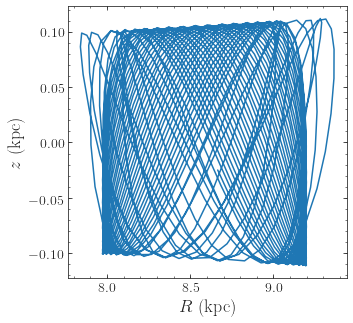

-4.858929947907809 7.174397973704449 -0.024881794579601452


In [16]:
print(pot)
obar=Orbit()
print(obar.x(),obar.y(),obar.z())
ts=np.linspace(0.,-5./bovy_conversion.time_in_Gyr(ro=r0,vo=v0),1000)
obar.integrate(ts,pot)
obar.plot()
plt.show()
plt.close()
print(obar.x(ts[-1]),obar.y(ts[-1]),obar.z(ts[-1]))


In [17]:
potbar=copy.deepcopy(pot)
potdw=copy.deepcopy(pot)
pottrans=copy.deepcopy(pot)

In [18]:
# Add density wave spiral arm potential (http://galpy.readthedocs.io/en/latest/reference/potentialspiralarms.html)
extra_pot2=potential.DehnenSmoothWrapperPotential(pot=potential.SpiralArmsPotential(N=4,amp=1.,phi_ref=np.pi/4.,alpha=np.deg2rad(12.),omega=0.79),tform=dp.tform())
potdw.append(extra_pot2)


In [19]:
# Add a series of three transient winding spirals
to=-12.9885852455
lifetimeS=1.3
betap=-0.1
sp= potential.SpiralArmsPotential(N=2,amp=0.75,phi_ref=25./180.*np.pi,alpha=np.deg2rad(25.))
csp= potential.GaussianAmplitudeWrapperPotential(\
       pot=potential.CorotatingRotationWrapperPotential(pot=sp,vpo=1.,to=to,beta=betap,pa=omega*to),
       to=to,sigma=lifetimeS)
pottrans.append(csp)
csp3= potential.GaussianAmplitudeWrapperPotential(\
       pot=potential.CorotatingRotationWrapperPotential(pot=sp,vpo=1.,to=to/2.,beta=betap,pa=omega*to),
       to=to/2.,sigma=lifetimeS)
pottrans.append(csp3)
csp5= potential.GaussianAmplitudeWrapperPotential(\
       pot=potential.CorotatingRotationWrapperPotential(pot=sp,vpo=1.,to=0.,beta=betap,pa=omega*to),
       to=0.,sigma=lifetimeS)
pottrans.append(csp5)


[<galpy.potential.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x11be2cef0>, <galpy.potential.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x11be2ce48>, <galpy.potential.TwoPowerSphericalPotential.NFWPotential object at 0x11be2ccf8>]
8.0 0.0 0.025


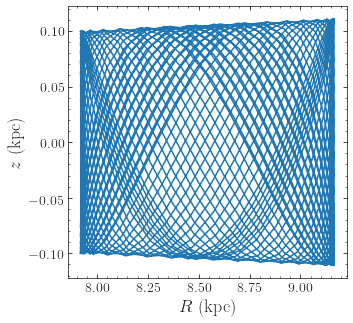

0.8747813742723841 8.10549423196543 0.09432708158303958


In [20]:
print(mwpot)
omw=Orbit()
print(omw.x(),omw.y(),omw.z())
ts=np.linspace(0.,-5./bovy_conversion.time_in_Gyr(ro=r0,vo=v0),1000)
omw.integrate(ts,mwpot)
omw.plot()
plt.show()
plt.close()

print(omw.x(ts[-1]),omw.y(ts[-1]),omw.z(ts[-1]))


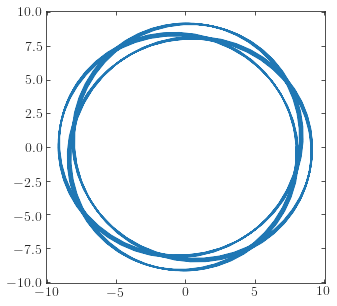

In [21]:
plt.plot(omw.x(ts),omw.y(ts))
plt.show()

[<galpy.potential.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x11bf63da0>, <galpy.potential.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x11bf63e10>, <galpy.potential.TwoPowerSphericalPotential.NFWPotential object at 0x11bf63c88>, <galpy.potential.DehnenBarPotential.DehnenBarPotential object at 0x11bf4d5f8>, <galpy.potential.WrapperPotential._DehnenSmoothWrapperPotential object at 0x11bf7d668>]
8.0 0.0 0.025


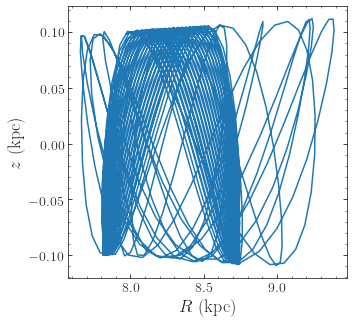

-6.465853739200843 -4.652948273813551 0.09830551465558358


TypeError: 'axis' is an invalid keyword to ufunc 'cos'

In [22]:
print(potdw)
odw=Orbit()
print(odw.x(),odw.y(),odw.z())
ts=np.linspace(0.,-5./bovy_conversion.time_in_Gyr(ro=r0,vo=v0),1000)
odw.integrate(ts,potdw)
odw.plot()
plt.show()
plt.close()

print(odw.x(ts[-1]),odw.y(ts[-1]),odw.z(ts[-1]))
print(potential.evaluatezforces(potdw,np.sqrt(odw.x(ts[-1])**2.+odw.y(ts[-1])**2.)/r0,odw.z(ts[-1])/r0,phi=np.arctan2(odw.y(ts[-1]),odw.x(ts[-1])),ro=r0,vo=v0))


In [ ]:
plt.plot(odw.x(ts),odw.z(ts))
plt.show()

In [ ]:
print(pottrans)
otrans=Orbit()
print(otrans.x(),otrans.y(),otrans.z())
ts=np.linspace(0.,-5./bovy_conversion.time_in_Gyr(ro=r0,vo=v0),1000)
otrans.integrate(ts,pottrans)
otrans.plot()
plt.show()
plt.close()

print(otrans.x(ts[-1]),otrans.y(ts[-1]),otrans.z(ts[-1]))


In [ ]:
plt.plot(otrans.x(ts),otrans.y(ts))
plt.show()

In [ ]:
class galpy_profile(LiteratureReferencesMixIn):
    """
    User-defined potential from GALPY
    
    .. [#] Bovy, J; ApJSS, Volume 216, Issue 2, article id. 29, 27 pp. (2015)
    
    """
    def __init__(self,pot,t=0. | units.Gyr,ro=8,vo=220.):
        LiteratureReferencesMixIn.__init__(self)
        self.pot = pot
        self.ro=ro
        self.vo=vo
        self.time=t
        self.t=t.value_in(units.Gyr)/bovy_conversion.time_in_Gyr(ro=self.ro,vo=self.vo)
        
        
    def evolve_model(self,dt=0 | units.Gyr):
        self.time+=dt
        self.t+=dt.value_in(units.Gyr)/bovy_conversion.time_in_Gyr(ro=self.ro,vo=self.vo)        
        
    def get_potential_at_point(self,eps,x,y,z):
        R=(x.value_in(units.kpc)**2.+y.value_in(units.kpc)**2.)**0.5
        zed=z.value_in(units.kpc)
        phi=np.arctan2(y.value_in(units.kpc),x.value_in(units.kpc))

        pot=potential.evaluatePotentials(self.pot,R/self.ro,zed/self.ro,phi=phi,t=self.t,ro=self.ro,vo=self.vo) | units.km**2*units.s**-2
                    
        return pot.as_quantity_in(units.m**2. * units.s**-2)

    def get_gravity_at_point(self,eps,x,y,z):
        
        R=(x.value_in(units.kpc)**2.+y.value_in(units.kpc)**2.)**0.5
        zed=z.value_in(units.kpc)
        phi=np.arctan2(y.value_in(units.kpc),x.value_in(units.kpc))
                
        ax=potential.evaluateRforces(self.pot,R/self.ro,zed/self.ro,phi=phi,t=self.t,ro=self.ro,vo=self.vo)*np.cos(phi) | units.kms * units.myr**-1
        ay=potential.evaluateRforces(self.pot,R/self.ro,zed/self.ro,phi=phi,t=self.t,ro=self.ro,vo=self.vo)*np.sin(phi) | units.kms * units.myr**-1
        az=potential.evaluatezforces(self.pot,R/self.ro,zed/self.ro,phi=phi,t=self.t,ro=self.ro,vo=self.vo) | units.kms * units.myr**-1

        return ax.as_quantity_in(units.m*units.s**-2),ay.as_quantity_in(units.m*units.s**-2),az.as_quantity_in(units.m*units.s**-2)

    def mass_density(self,x,y,z):
        R=(x.value_in(units.kpc)**2.+y.value_in(units.kpc)**2.)**0.5
        zed=z.value_in(units.kpc)
        phi=np.arctan2(y.value_in(units.kpc),x.value_in(units.kpc))     
        dens=potential.evaluateDensities(self.pot,R/self.ro,zed/self.ro,phi=phi,t=self.t,ro=self.ro,vo=self.vo) | units.MSun/(units.parsec**3.)
                        
        return dens.as_quantity_in(units.kg * units.m**-3)

    def circular_velocity(self,r):
        vcirc=potential.vcirc(self.pot,r.value_in(units.kpc)/self.ro,phi=0,ro=self.ro,vo=self.vo) | units.kms
        return vcirc.as_quantity_in(units.m * units.s**-1)
        
    def enclosed_mass(self,r):
        grav=4.302e-6 #kpc (km/s)^2/Msun
        vc2=potential.vcirc(self.pot,r.value_in(units.kpc)/self.ro,phi=0,ro=self.ro,vo=self.vo)**2.
        menc= vc2*r.value_in(units.kpc)/grav | units.MSun
        return menc.as_quantity_in(units.kg)


In [ ]:
#Read in initial conditions
data=np.loadtxt('00000.dat')
x=data[:,1] | units.kpc
y=data[:,2] | units.kpc
z=data[:,3] | units.kpc
r=np.sqrt(x*x+y*y+z*z)
Rxy=np.sqrt(x.value_in(units.kpc)**2.+y.value_in(units.kpc)**2.)
zed=z.value_in(units.kpc)
phi=np.arctan2(y.value_in(units.kpc),x.value_in(units.kpc))

In [ ]:
plt.plot(x.value_in(units.kpc),y.value_in(units.kpc),'.')
plt.show()

print(potential.evaluatezforces(potdw,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0))


In [ ]:
#Test in MWPOT:
galaxy_code=galpy_profile(mwpot)
v=galaxy_code.get_potential_at_point(0.,x,y,z)
v2=potential.evaluatePotentials(mwpot,Rxy/r0,zed/r0,phi,ro=r0,vo=v0)

plt.plot(v.value_in(units.kms**2.),v2,'.')
plt.show()
plt.close()

ax,ay,az=galaxy_code.get_gravity_at_point(0.,x,y,z)
a2x,a2y,a2z=potential.evaluateRforces(mwpot,Rxy/r0,zed/r0,phi,ro=r0,vo=v0)*np.cos(phi),potential.evaluateRforces(mwpot,Rxy/r0,zed/r0,phi,ro=r0,vo=v0)*np.sin(phi),potential.evaluatezforces(mwpot,Rxy/r0,zed/r0,phi,ro=r0,vo=v0)
plt.plot(az.value_in(units.kms/units.myr),a2z,'.')
plt.show()

In [ ]:
#Test in PotBar:
galaxy_code=galpy_profile(potbar)
v=galaxy_code.get_potential_at_point(0.,x,y,z)
v2=potential.evaluatePotentials(potbar,Rxy/r0,zed/r0,phi,ro=r0,vo=v0)

plt.plot(v.value_in(units.kms**2.),v2,'.')
plt.show()
plt.close()

ax,ay,az=galaxy_code.get_gravity_at_point(0.,x,y,z)
a2x,a2y,a2z=potential.evaluateRforces(potbar,Rxy/r0,zed/r0,phi,ro=r0,vo=v0)*np.cos(phi),potential.evaluateRforces(potbar,Rxy/r0,zed/r0,phi,ro=r0,vo=v0)*np.sin(phi),potential.evaluatezforces(potbar,Rxy/r0,zed/r0,phi,ro=r0,vo=v0)
plt.plot(az.value_in(units.kms/units.myr),a2z,'.')
plt.show()

In [ ]:
#Test in Density WAve:
galaxy_code=galpy_profile(potdw)
v=galaxy_code.get_potential_at_point(0.,x,y,z)
v2=potential.evaluatePotentials(potdw,Rxy/r0,zed/r0,phi,ro=r0,vo=v0)

plt.plot(v.value_in(units.kms**2.),v2,'.')
plt.show()
plt.close()

ax,ay,az=galaxy_code.get_gravity_at_point(0.,x,y,z)
a2x,a2y,a2z=potential.evaluateRforces(potdw,Rxy/r0,zed/r0,phi,ro=r0,vo=v0)*np.cos(phi),potential.evaluateRforces(potdw,Rxy/r0,zed/r0,phi,ro=r0,vo=v0)*np.sin(phi),potential.evaluatezforces(potdw,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0)
plt.plot(az.value_in(units.kms/units.myr),a2z,'.')
plt.show()


In [ ]:
print(potential.evaluatePotentials(potdw,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0))
print(potential.evaluatePotentials(potdw,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0))

print(potential.evaluatezforces(potdw,Rxy/r0,zed/r0,phi=phi,ro=r0,vo=v0))
print(potential.evaluatezforces(potdw,Rxy[0]/r0,zed[0]/r0,phi=phi[0],ro=r0,vo=v0))

In [ ]:
plt.hist(phi)
plt.show()